In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
mc=pd.read_csv('micro_credit.csv', parse_dates=['pdate'])
mc.head(10)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-10-08
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,...,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,2016-02-07
6,7,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-05-07
7,8,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,...,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,UPW,2016-05-08
8,9,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,...,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,UPW,2016-06-15
9,10,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-06


In [3]:
mr=mc.drop('Unnamed: 0', axis=1)

In [4]:
mr

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-10-08
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-12-06
209590,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [5]:
mr.dtypes

label                            int64
msisdn                          object
aon                            float64
daily_decr30                   float64
daily_decr90                   float64
rental30                       float64
rental90                       float64
last_rech_date_ma              float64
last_rech_date_da              float64
last_rech_amt_ma                 int64
cnt_ma_rech30                    int64
fr_ma_rech30                   float64
sumamnt_ma_rech30              float64
medianamnt_ma_rech30           float64
medianmarechprebal30           float64
cnt_ma_rech90                    int64
fr_ma_rech90                     int64
sumamnt_ma_rech90                int64
medianamnt_ma_rech90           float64
medianmarechprebal90           float64
cnt_da_rech30                  float64
fr_da_rech30                   float64
cnt_da_rech90                    int64
fr_da_rech90                     int64
cnt_loans30                      int64
amnt_loans30             

In [6]:
mr.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In this we can clearly see that two columns are in object type and one column pdate is in datetime type so 
we need to convert them into float or int type that is numerical value by using LabelEncoder or onehotencoder. 
we area going to use label encoderas it converts more than two variable without any constraints.

In [7]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
mr['msisdn']=lb.fit_transform(mr['msisdn'])
mr['pdate']=lb.fit_transform(mr['pdate'])

In [8]:
mr.dtypes

label                     int64
msisdn                    int32
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [9]:
mr.columns.value_counts().sum()

36

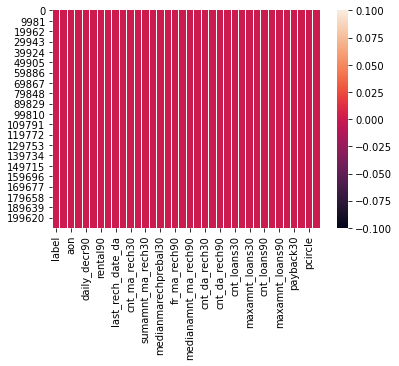

In [10]:
sns.heatmap(mr.isnull())

In [11]:
mr.corr()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
label,1.000000,0.001976,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,...,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,0.043532
msisdn,0.001976,1.000000,0.000566,0.000717,0.000950,-0.001404,-0.000691,-0.000928,0.001400,-0.002368,...,0.002170,-0.000755,0.000986,0.001859,-0.000155,0.003286,0.001210,0.002922,0.002671,0.002487
aon,-0.003785,0.000566,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,...,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,0.000701
daily_decr30,0.168298,0.000717,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,...,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,0.193579
daily_decr90,0.166150,0.000950,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,...,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,0.209070
rental30,0.058085,-0.001404,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,...,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,0.135019
rental90,0.075521,-0.000691,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,...,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,0.165181
last_rech_date_ma,0.003728,-0.000928,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,...,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,-0.002490
last_rech_date_da,0.001711,0.001400,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,...,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,-0.001059
last_rech_amt_ma,0.131804,-0.002368,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,...,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,0.034245


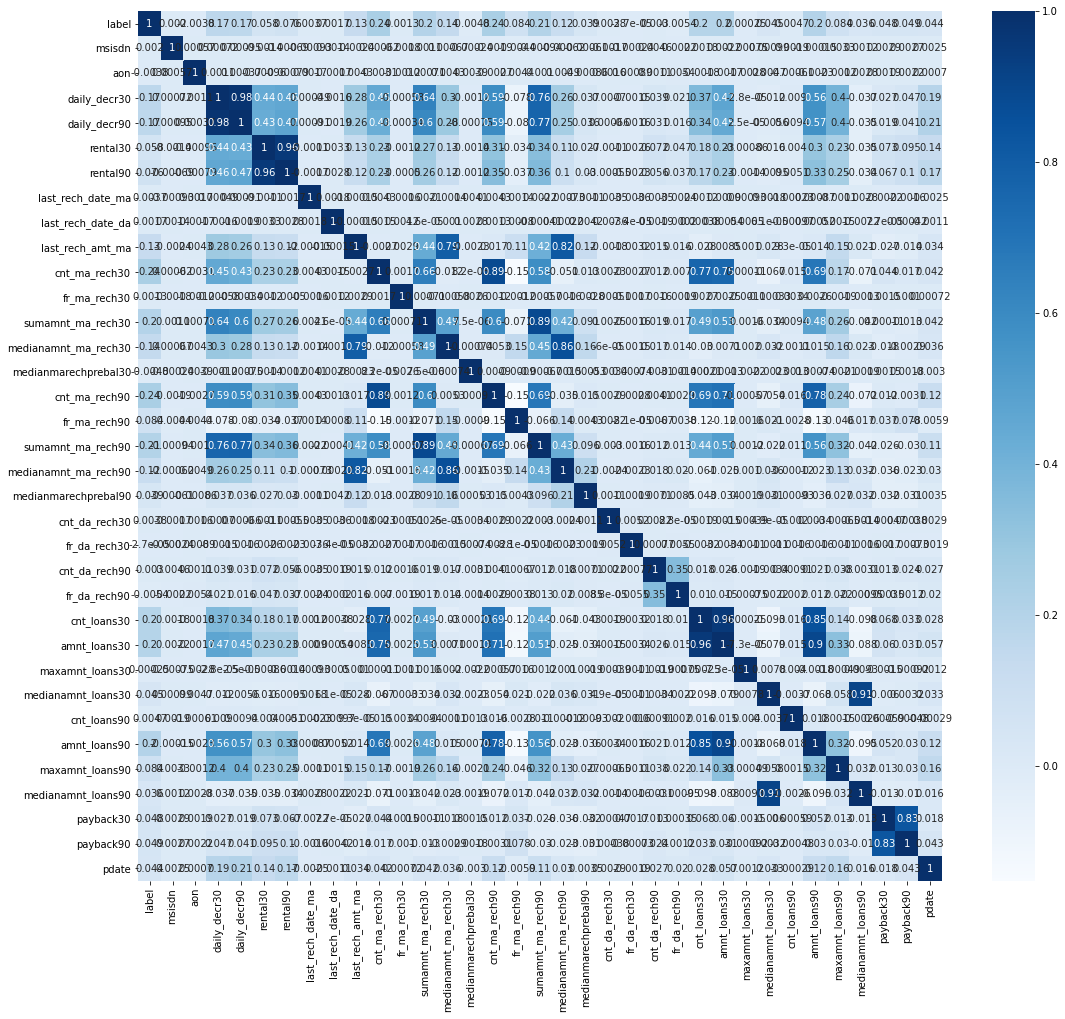

In [12]:
plt.figure(figsize=(18,16))
sns.heatmap(mr.corr(), annot=True, cmap='Blues')

we are going to plot some graph related to the columns it would help us understand better 
realtionship between the columns. we are going to use the visualisation commands like seaborn and matplotlib to plot distplot,
countplot and catplot and even at the end we are going to use boxplot to understand the outliers present in the data.

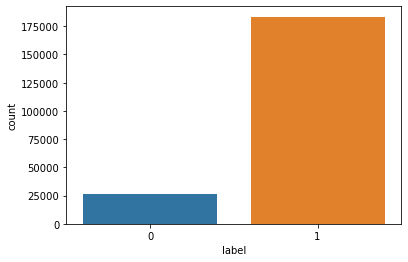

In [13]:
sns.countplot(x='label', data=mr) 

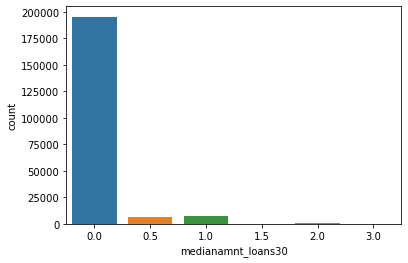

In [14]:
sns.countplot(x='medianamnt_loans30', data=mr)

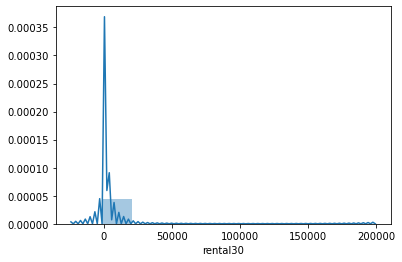

In [15]:
sns.distplot(mr['rental30'], bins=10)

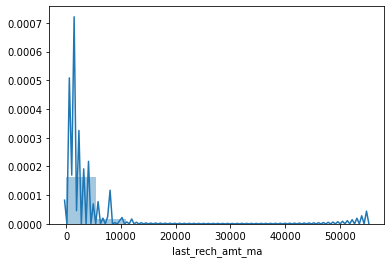

In [16]:
sns.distplot(mr['last_rech_amt_ma'], bins=10)

We will now look into outliers and remove it, we can easliy look into the mr.describe function we 
can see that there are too many outliers and by using outliers we can see them visually.

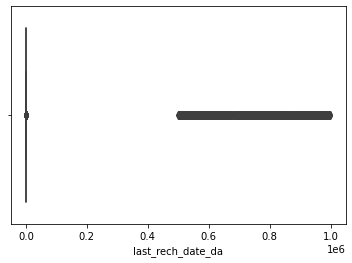

In [17]:
sns.boxplot(mr['last_rech_date_da'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d850422490>,
 'caps': [<matplotlib.lines.Line2D at 0x1d850422b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d850422190>],
 'medians': [<matplotlib.lines.Line2D at 0x1d85042c280>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d85042c550>],
 'means': []}

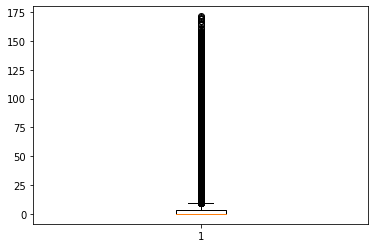

In [18]:
plt.boxplot(mr['payback30'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d850479be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d8504842e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d850479880>],
 'medians': [<matplotlib.lines.Line2D at 0x1d8504849a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d850484ca0>],
 'means': []}

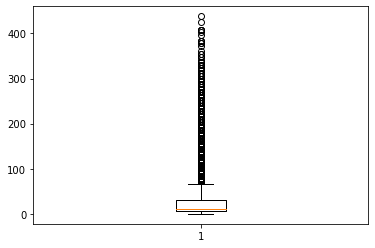

In [19]:
plt.boxplot(mr['amnt_loans90'])

In [20]:
mr_d=mr.drop('pcircle', axis=1)

In [21]:
mr_d

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,46
1,1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,75
2,1,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,67
3,1,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,15
4,1,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,42866,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,22
209589,1,178248,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,79
209590,1,53995,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,55
209591,1,111388,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,...,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,51


In [22]:
from scipy.stats import zscore
z=np.abs(zscore(mr_d))
mr_n=mr_d[(z<3).all(axis=1)]
mr_n

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,46
1,1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,75
2,1,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,67
3,1,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,15
4,1,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,42866,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,22
209589,1,178248,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,79
209590,1,53995,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,55
209591,1,111388,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,...,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,51


Now checking for the outliers again.

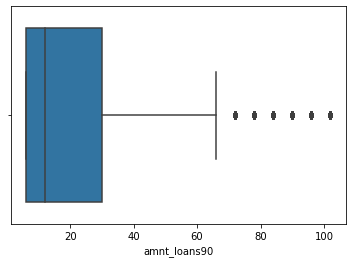

In [23]:
sns.boxplot(mr_n['amnt_loans90'])

Now we will check for the skewness in the data, if any then we will try top remove it, 
we want skewness of any column to be arounf 0.5. we are going to plot histogram to check if the data is 
normally distributed or is right skewed or left skewed.

In [24]:
mr_n.skew()

label                   -2.090315
msisdn                  -0.000215
aon                      0.957902
daily_decr30             1.963747
daily_decr90             2.077637
rental30                 2.194889
rental90                 2.244866
last_rech_date_ma        3.099484
last_rech_date_da       10.384887
last_rech_amt_ma         2.125356
cnt_ma_rech30            1.175157
fr_ma_rech30             2.005139
sumamnt_ma_rech30        1.634226
medianamnt_ma_rech30     2.326312
medianmarechprebal30    10.538891
cnt_ma_rech90            1.321145
fr_ma_rech90             1.985567
sumamnt_ma_rech90        1.707309
medianamnt_ma_rech90     2.373140
medianmarechprebal90     3.692650
cnt_da_rech30           50.760988
fr_da_rech30             0.000000
cnt_da_rech90            6.934340
fr_da_rech90             0.000000
cnt_loans30              1.465414
amnt_loans30             1.441450
maxamnt_loans30         53.470571
medianamnt_loans30       5.355423
cnt_loans90              1.708977
amnt_loans90  

(array([1.61399e+05, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+01,
        7.00000e+00, 1.10000e+01, 1.30000e+01, 1.00000e+01, 1.40000e+01]),
 array([    0.      ,  1298.461733,  2596.923466,  3895.385199,
         5193.846932,  6492.308665,  7790.770398,  9089.232131,
        10387.693864, 11686.155597, 12984.61733 ]),
 <a list of 10 Patch objects>)

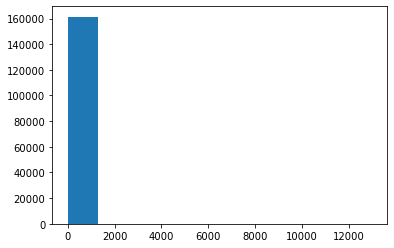

In [25]:
plt.hist(mr_n['maxamnt_loans30'])

(array([108819.,  20208.,  12593.,   7818.,   4963.,   3102.,   1898.,
          1136.,    639.,    289.]),
 array([  -41.755 ,  3845.6805,  7733.116 , 11620.5515, 15507.987 ,
        19395.4225, 23282.858 , 27170.2935, 31057.729 , 34945.1645,
        38832.6   ]),
 <a list of 10 Patch objects>)

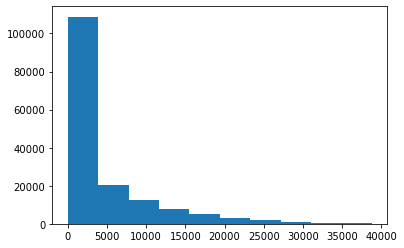

In [26]:
plt.hist(mr_n['daily_decr90'], bins=10)

(array([4.00000e+00, 5.00000e+00, 1.58768e+05, 7.89000e+02, 6.95000e+02,
        5.35000e+02, 3.01000e+02, 1.41000e+02, 1.19000e+02, 1.08000e+02]),
 array([-29. , -14.6,  -0.2,  14.2,  28.6,  43. ,  57.4,  71.8,  86.2,
        100.6, 115. ]),
 <a list of 10 Patch objects>)

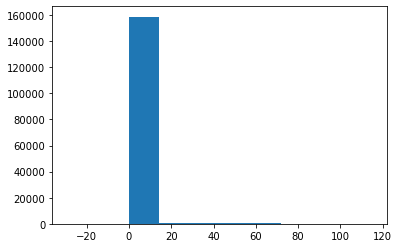

In [27]:
plt.hist(mr_n['last_rech_date_da']) 

In [28]:
df1=mr_n.copy()

In [29]:
# We tried removing skewness from vairous parameteres like log, sqrt but every time we did it showed null values.
#import warnings
#from scipy.stats import boxcox
#warnings.filterwarnings('ignore')
#mic=df3.skew()
#col=df3.columns
#for i in range(10,len(mic)):
 #   if (mic[i]>0.5):
  #      df3[col[i]]=np.log1p(df3[col[i]])

In [30]:
df1.skew()

label                   -2.090315
msisdn                  -0.000215
aon                      0.957902
daily_decr30             1.963747
daily_decr90             2.077637
rental30                 2.194889
rental90                 2.244866
last_rech_date_ma        3.099484
last_rech_date_da       10.384887
last_rech_amt_ma         2.125356
cnt_ma_rech30            1.175157
fr_ma_rech30             2.005139
sumamnt_ma_rech30        1.634226
medianamnt_ma_rech30     2.326312
medianmarechprebal30    10.538891
cnt_ma_rech90            1.321145
fr_ma_rech90             1.985567
sumamnt_ma_rech90        1.707309
medianamnt_ma_rech90     2.373140
medianmarechprebal90     3.692650
cnt_da_rech30           50.760988
fr_da_rech30             0.000000
cnt_da_rech90            6.934340
fr_da_rech90             0.000000
cnt_loans30              1.465414
amnt_loans30             1.441450
maxamnt_loans30         53.470571
medianamnt_loans30       5.355423
cnt_loans90              1.708977
amnt_loans90  

In [31]:
df1['payback30']=np.sqrt(df1['payback30'])

In [32]:
df1['payback90']=np.sqrt(df1['payback90'])

In [33]:
df1.skew()

label                   -2.090315
msisdn                  -0.000215
aon                      0.957902
daily_decr30             1.963747
daily_decr90             2.077637
rental30                 2.194889
rental90                 2.244866
last_rech_date_ma        3.099484
last_rech_date_da       10.384887
last_rech_amt_ma         2.125356
cnt_ma_rech30            1.175157
fr_ma_rech30             2.005139
sumamnt_ma_rech30        1.634226
medianamnt_ma_rech30     2.326312
medianmarechprebal30    10.538891
cnt_ma_rech90            1.321145
fr_ma_rech90             1.985567
sumamnt_ma_rech90        1.707309
medianamnt_ma_rech90     2.373140
medianmarechprebal90     3.692650
cnt_da_rech30           50.760988
fr_da_rech30             0.000000
cnt_da_rech90            6.934340
fr_da_rech90             0.000000
cnt_loans30              1.465414
amnt_loans30             1.441450
maxamnt_loans30         53.470571
medianamnt_loans30       5.355423
cnt_loans90              1.708977
amnt_loans90  

Data has the columns which has many different units which needs to be converted in same unit by using standard scaler function.

In [34]:
x=df1.drop('label', axis=1)
y=df1['label']

In [35]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x=sd.fit_transform(x)

In [36]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
max_scr=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state, test_size=0.2)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    y_pred=lg.predict(x_test)
    acc_scr=accuracy_score(y_test,y_pred)
    if acc_scr>max_scr:
        max_scr=acc_scr
        final_rstate=r_state
        
print('The corresponding value for maximum rstate',final_rstate, 'to the acc Score is', max_scr)

The corresponding value for maximum rstate 55 to the acc Score is 0.8687950949122101


In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= 55, test_size=0.2)
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
print('Accuracy score',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Confusion matrix',confusion_matrix(y_test,y_pred))

Accuracy score 0.8687950949122101
              precision    recall  f1-score   support

           0       0.57      0.10      0.17      4343
           1       0.88      0.99      0.93     27950

    accuracy                           0.87     32293
   macro avg       0.72      0.54      0.55     32293
weighted avg       0.83      0.87      0.83     32293

Confusion matrix [[  428  3915]
 [  322 27628]]


In [38]:
from sklearn.model_selection import cross_val_score
cross_val_scr=cross_val_score(lg,x,y, scoring='accuracy', cv=5).mean()
cross_val_scr

0.8645898491933236

In [39]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
y_train.value_counts()

1    111115
0     18057
Name: label, dtype: int64

In [42]:
smt = SMOTE()
x_smote_train, y_smote_train = smt.fit_sample(x_train, y_train)

In [43]:
np.bincount(y_smote_train)

array([111115, 111115], dtype=int64)

In [44]:
x_smote_train,x_test,y_smote_train,y_test=train_test_split(x,y,random_state= 65, test_size=0.2)
lg=LogisticRegression()
lg.fit(x_smote_train,y_smote_train)
y_pred=lg.predict(x_test)
acc_scr=accuracy_score(y_test,y_pred)
acc_scr

0.8645836559006596

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.10      0.17      4510
           1       0.87      0.99      0.93     27783

    accuracy                           0.86     32293
   macro avg       0.73      0.54      0.55     32293
weighted avg       0.83      0.86      0.82     32293



no change is specifically observed so will even try different algorithms.

In [46]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [48]:
x_smote_train,x_test,y_smote_train,y_test=train_test_split(x,y,random_state= 65, test_size=0.2)
knn=KNeighborsClassifier()
knn.fit(x_smote_train,y_smote_train)
y_pred=knn.predict(x_test)
acc_scr=accuracy_score(y_test,y_pred)
acc_scr

0.8650171863871428

In [49]:
print(classification_report(y_test,y_pred))
print('\n')
cms=confusion_matrix(y_test,y_pred)
print('Confusion_matrix',cms)

              precision    recall  f1-score   support

           0       0.52      0.36      0.43      4510
           1       0.90      0.95      0.92     27783

    accuracy                           0.87     32293
   macro avg       0.71      0.65      0.68     32293
weighted avg       0.85      0.87      0.85     32293



Confusion_matrix [[ 1637  2873]
 [ 1486 26297]]


In [50]:
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score',roc_auc)

roc_auc_score 0.6547426152619449


No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


Text(0.5, 0, 'False_positive_rate')

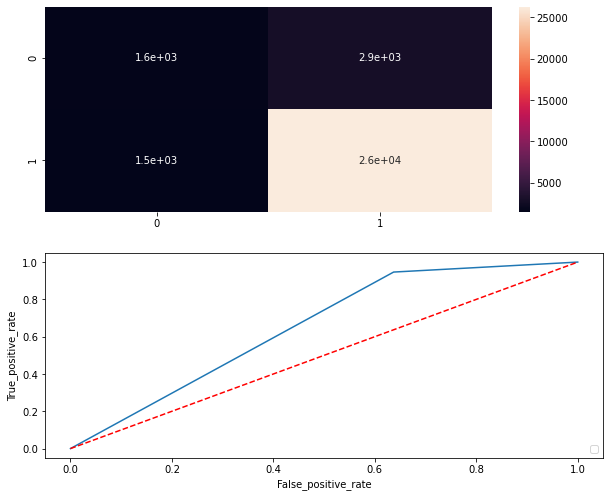

In [51]:
plt.figure(figsize=(10,40))
plt.subplot(911)
print(sns.heatmap(cms,annot=True))
plt.subplot(912)
plt.plot(false_positive_rate,true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True_positive_rate')
plt.xlabel('False_positive_rate')
    

In [52]:
x_smote_train,x_test,y_smote_train,y_test=train_test_split(x,y,random_state= 65, test_size=0.2)
dtc=DecisionTreeClassifier()
dtc.fit(x_smote_train,y_smote_train)
y_pred=dtc.predict(x_test)
acc_scr=accuracy_score(y_test,y_pred)
acc_scr

0.8706840491747437

In [53]:
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score',roc_auc)

roc_auc_score 0.7452391686504845


No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


Text(0.5, 0, 'False_positive_rate')

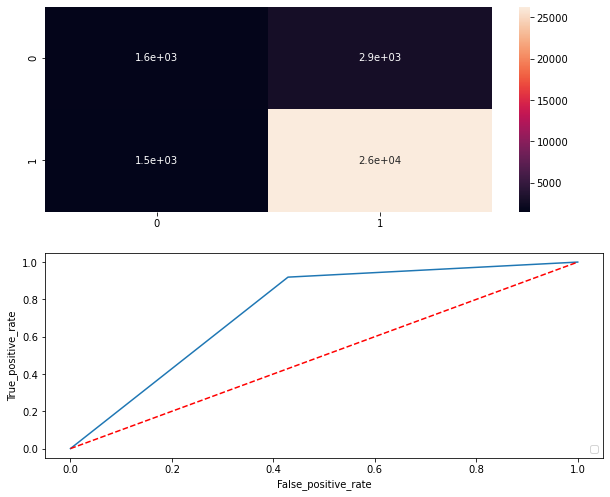

In [54]:
plt.figure(figsize=(10,40))
plt.subplot(911)
print(sns.heatmap(cms,annot=True))
plt.subplot(912)
plt.plot(false_positive_rate,true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True_positive_rate')
plt.xlabel('False_positive_rate')

In [55]:
print(classification_report(y_test,y_pred))
print('\n')
cms=confusion_matrix(y_test,y_pred)
print('Confusion_matrix',cms)

              precision    recall  f1-score   support

           0       0.53      0.57      0.55      4510
           1       0.93      0.92      0.92     27783

    accuracy                           0.87     32293
   macro avg       0.73      0.75      0.74     32293
weighted avg       0.87      0.87      0.87     32293



Confusion_matrix [[ 2576  1934]
 [ 2242 25541]]


In [56]:
x_smote_train,x_test,y_smote_train,y_test=train_test_split(x,y,random_state= 65, test_size=0.2)
gnb=GaussianNB()
gnb.fit(x_smote_train,y_smote_train)
y_pred=gnb.predict(x_test)
acc_scr=accuracy_score(y_test,y_pred)
acc_scr

0.6546310345895395

In [57]:
print(classification_report(y_test,y_pred))
print('\n')
cms=confusion_matrix(y_test,y_pred)
print('Confusion_matrix',cms)

              precision    recall  f1-score   support

           0       0.26      0.83      0.40      4510
           1       0.96      0.63      0.76     27783

    accuracy                           0.65     32293
   macro avg       0.61      0.73      0.58     32293
weighted avg       0.86      0.65      0.71     32293



Confusion_matrix [[ 3737   773]
 [10380 17403]]


In [58]:
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score',roc_auc)

roc_auc_score 0.7274966714239984


AxesSubplot(0.125,0.808774;0.62x0.0712264)


No handles with labels found to put in legend.


Text(0.5, 0, 'False_positive_rate')

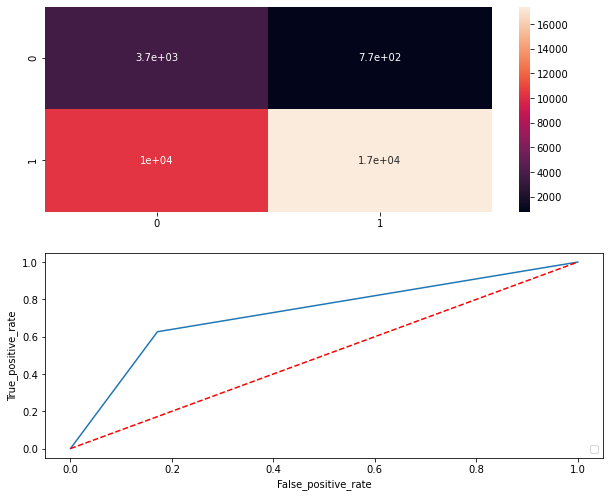

In [59]:
plt.figure(figsize=(10,40))
plt.subplot(911)
print(sns.heatmap(cms,annot=True))
plt.subplot(912)
plt.plot(false_positive_rate,true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True_positive_rate')
plt.xlabel('False_positive_rate')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
parameters={'learning_rate':[0.1,0.01,0.001,0.0001], 'n_estimators':[100,200,500,1000], 'base_estimator':[dtc]}
grad=GridSearchCV(ada,parameters,cv=5)
grad.fit(x,y)
grad.best_params_

In [ ]:
gbra=AdaBoostClassifier(learning_rate=0.0001, n_estimators=500, base_estimator=dtc)
gbra.fit(x_smote_train,y_smote_train)
gbra.score(x_train,y_train)
pred_y=gbra.predict(x_test)
acc_scrrg=accuracy_score(y_test,y_pred)
print('acc score',acc_scrrg)


In [ ]:
df1=pd.DataFrame(pred_y)
df1.to_csv('dtc_Loan_Fraud.csv')

In [ ]:
import joblib
joblib.dump(dtc,'dtc_Loan_Fraud.pkl')